In [1]:
import pandas as pd

# Load the datasets
telco_churn_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
ecommerce_dataset_path = "E Commerce Dataset.xlsx"

# Read the Telco customer churn CSV file
telco_churn_df = pd.read_csv(telco_churn_path)

# Read the E-Commerce dataset from the Excel file
ecommerce_df = pd.read_excel(ecommerce_dataset_path)

# Handling missing values and feature engineering
telco_churn_df['TotalCharges'] = pd.to_numeric(telco_churn_df['TotalCharges'], errors='coerce')
telco_churn_df.fillna(telco_churn_df.mean(), inplace=True)

# Dropping unnecessary columns
telco_churn_df_processed = telco_churn_df.drop(columns=['customerID', 'TotalCharges'])

# Encoding categorical variables
telco_churn_df_processed = pd.get_dummies(telco_churn_df_processed, drop_first=True)

# Splitting the data into features and target variable
X = telco_churn_df_processed.drop(columns=['Churn_Yes'])
y = telco_churn_df_processed['Churn_Yes']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


C:\Users\labut\AppData\Local\Temp\ipykernel_13668\291248951.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  telco_churn_df.fillna(telco_churn_df.mean(), inplace=True)


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Accuracy: 0.7875059157595835
Precision: 0.6535626535626535
Recall: 0.4634146341463415
F1 Score: 0.5423037716615698
ROC AUC Score: 0.6858983502115723


In [3]:
# Getting feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the top 10 features
top_10_features = feature_importance_df.head(10)
print(top_10_features)


                           Feature  Importance
1                           tenure    0.242164
2                   MonthlyCharges    0.223988
9      InternetService_Fiber optic    0.040200
24               Contract_Two year    0.039959
27  PaymentMethod_Electronic check    0.039475
3                      gender_Male    0.033825
25            PaperlessBilling_Yes    0.029721
4                      Partner_Yes    0.029690
12              OnlineSecurity_Yes    0.028680
23               Contract_One year    0.027990


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


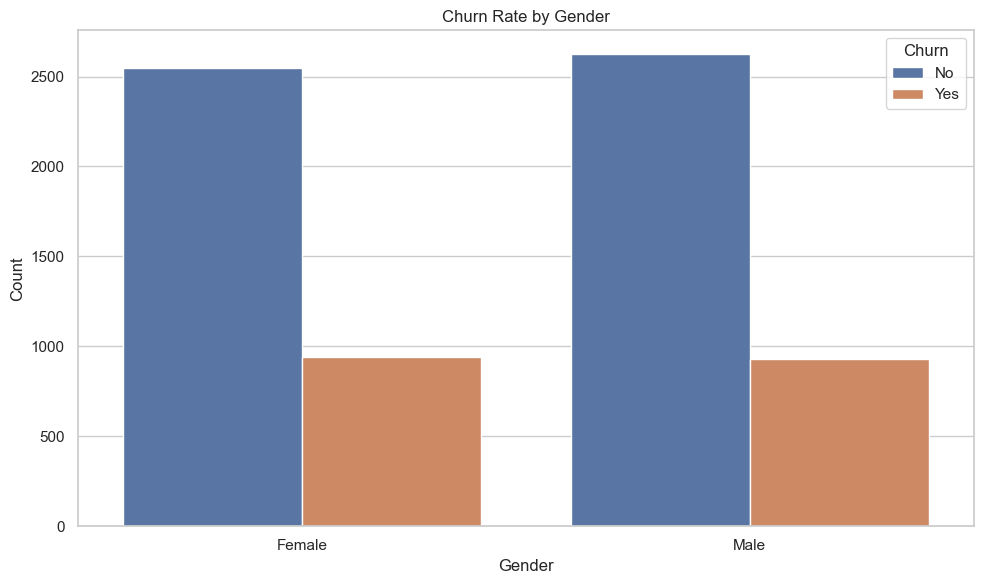

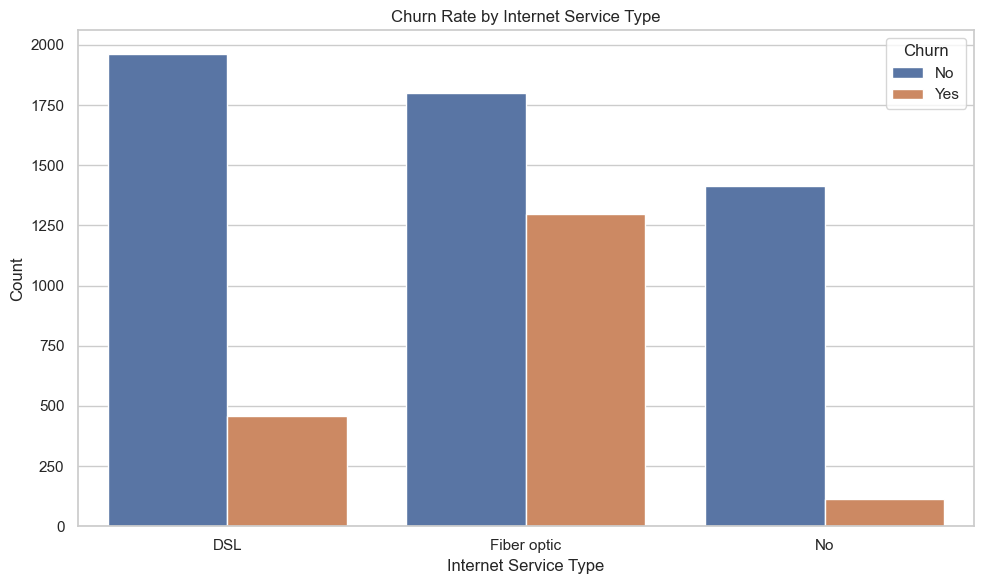

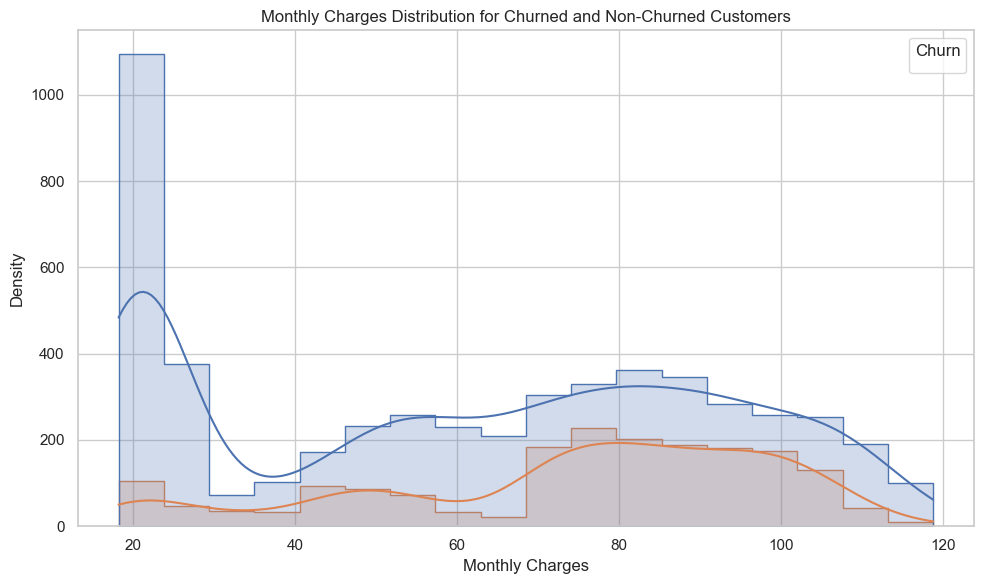

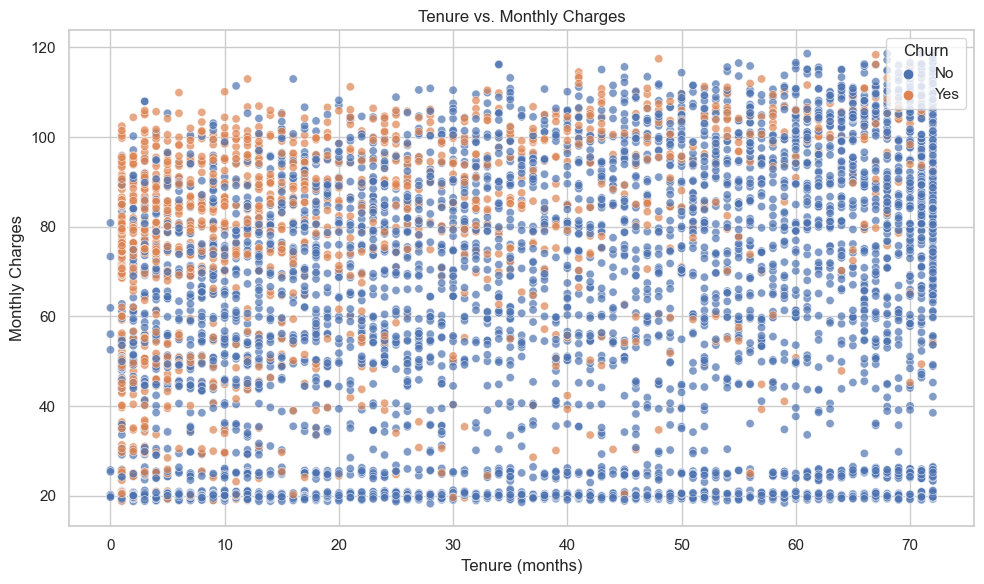

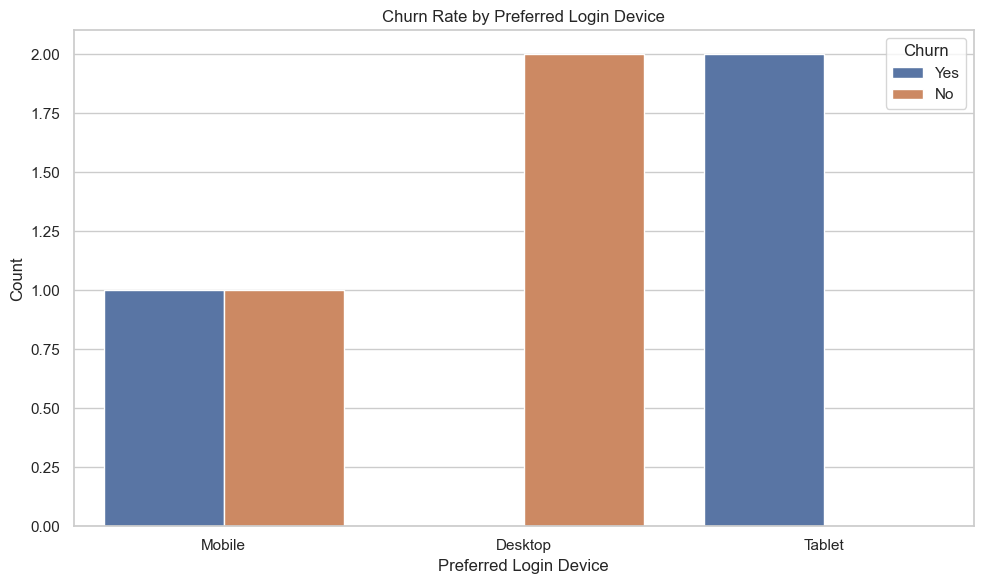

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Plot 1: Churn Rate by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=telco_churn_df, x='gender', hue='Churn')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.savefig('figures/plot1_churn_rate_by_gender.png')

# Plot 2: Churn Rate by Internet Service Type
plt.figure(figsize=(10, 6))
sns.countplot(data=telco_churn_df, x='InternetService', hue='Churn')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.savefig('figures/plot2_churn_rate_by_internet_service.png')

# Plot 3: Monthly Charges Distribution for Churned and Non-Churned Customers
plt.figure(figsize=(10, 6))
sns.histplot(data=telco_churn_df, x='MonthlyCharges', hue='Churn', kde=True, element='step')
plt.title('Monthly Charges Distribution for Churned and Non-Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.savefig('figures/plot3_monthly_charges_distribution.png')

# Plot 4: Tenure vs. Monthly Charges Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=telco_churn_df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.7)
plt.title('Tenure vs. Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.savefig('figures/plot4_tenure_vs_monthly_charges.png')

# Plot 5: Churn Rate by Preferred Login Device (Mock Data)
mock_data = {
    'PreferredLoginDevice': ['Mobile', 'Desktop', 'Tablet', 'Mobile', 'Desktop', 'Tablet'],
    'Churn': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}
mock_df = pd.DataFrame(mock_data)

plt.figure(figsize=(10, 6))
sns.countplot(data=mock_df, x='PreferredLoginDevice', hue='Churn')
plt.title('Churn Rate by Preferred Login Device')
plt.xlabel('Preferred Login Device')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.savefig('figures/plot5_churn_rate_by_login_device_fixed.png')
